In [1]:
!pip install brian2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00


In [2]:
from brian2 import *
from matplotlib import pyplot as plt
%matplotlib inline

Perfect Integrator Model

WARNING    'I_ext' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 0. * amp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value array([   0.        ,  -49.75083125,  -99.00663347, ...,  -60.1247525 ,
       -109.27733247, -157.9408361 ]) * uvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


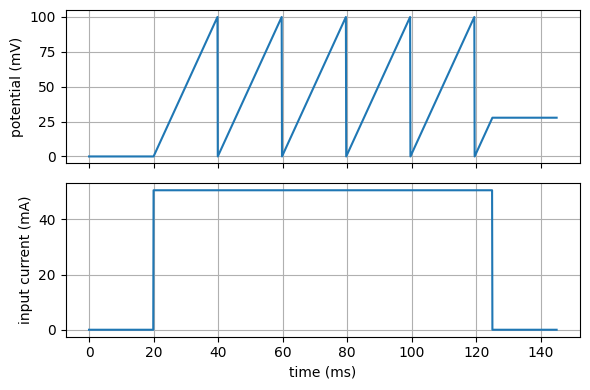

In [8]:
from brian2 import *

start_scope()

# Constants
C = 10*mfarad
I_ext = 0*mA
v_thr = 100*mV  # Simple threshold for spiking

# Differential equation
eqn = '''
dv/dt = I_ext/C : volt
I_ext: amp
'''

# Neuron group
neuron = NeuronGroup(1, eqn, threshold='v > v_thr', reset='v = 0*mV', method='exponential_euler')
neuron.v = 0*mV  # Initial condition

M = StateMonitor(neuron, variables=['v','I_ext'], record=True)

# Simulation

run(20*ms)
neuron.I_ext = 50.5*mA
run(105*ms)
neuron.I_ext = 0*mA
run(20*ms)

# Plotting the neuron's membrane potential over time and the input current
fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# Plot membrane potential
axs[0].plot(M.t/ms, M.v[0]/mV)
axs[0].set_ylabel('potential (mV)')
axs[0].grid(True)
# Plot input current
axs[1].plot(M.t/ms, M.I_ext[0]/mA)
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('input current (mA)')
axs[1].grid(True)
plt.tight_layout()
plt.show()




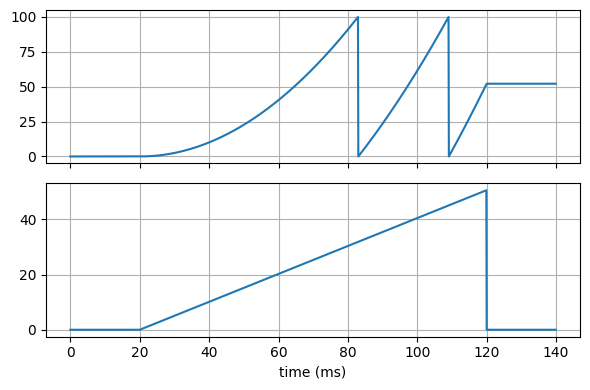

In [9]:
from brian2 import *
import numpy as np

start_scope()

# Constants
C = 10 * mfarad  # Capacitance
v_thr = 100 * mV  # Threshold voltage

# Time setup for the simulation
pre_duration = 20 * ms  # Duration before the ramp starts
ramp_duration = 100 * ms  # Duration of the ramp
post_duration = 20 * ms  # Duration after the ramp ends
total_duration = pre_duration + ramp_duration + post_duration  # Total simulation duration

# Create a ramp current with zero padding at both ends
current = np.zeros(int(total_duration / defaultclock.dt)) * mA  # Initialize the current array with zeros
ramp_start = int(pre_duration / defaultclock.dt)  # Start index of the ramp
ramp_end = ramp_start + int(ramp_duration / defaultclock.dt)  # End index of the ramp
current[ramp_start:ramp_end] = np.linspace(0, 50.5, int(ramp_duration / defaultclock.dt)) * mA  # Set ramp values

# Create TimedArray for the ramp current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Neuron model equations
eqn = '''
dv/dt = I_ext(t)/C : volt
'''

# Setup NeuronGroup
neuron = NeuronGroup(1, eqn, threshold='v > v_thr', reset='v = 0*mV', method='exponential_euler')
neuron.v = 0 * mV  # Initial condition

# Monitoring
M = StateMonitor(neuron, 'v', record=True)

# Run the simulation
run(total_duration)

# Plotting the neuron's membrane potential over time and the input current
fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# Plot membrane potential
axs[0].plot(M.t/ms, M.v[0]/mV)
axs[0].grid(True)

# Plot input current
axs[1].plot(M.t/ms, I_ext(M.t)/mA)
axs[1].set_xlabel('time (ms)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


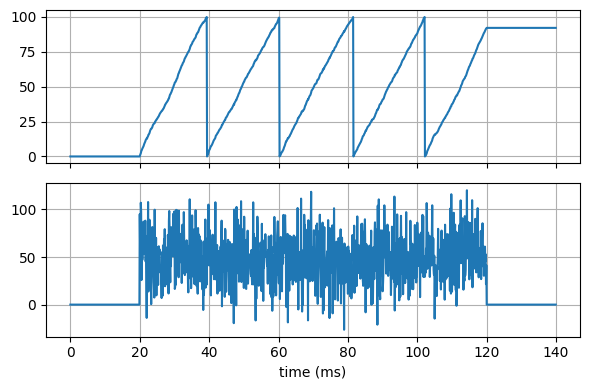

In [13]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

# Constants
C = 10 * mfarad  # Capacitance
v_thr = 100 * mV  # Threshold voltage

# Time setup for the simulation
pre_duration = 20 * ms  # Duration before the noise starts
noise_duration = 100 * ms  # Duration of the noise
post_duration = 20 * ms  # Duration after the noise ends
total_duration = pre_duration + noise_duration + post_duration  # Total simulation duration

# Create a current array with Gaussian noise during the noise period
current = np.zeros(int(total_duration / defaultclock.dt)) * mA  # Initialize the current array with zeros
noise_start = int(pre_duration / defaultclock.dt)  # Start index of the noise
noise_end = noise_start + int(noise_duration / defaultclock.dt)  # End index of the noise

# Gaussian noise parameters
mean_current = 50.5  # Mean current
std_dev = 25.25 # 50% of the mean current

# Generate Gaussian noise
np.random.seed(0)  # Seed for reproducibility
gaussian_noise = np.random.normal(mean_current, std_dev, noise_end - noise_start) * mA

# Set Gaussian noise values in the current array
current[noise_start:noise_end] = gaussian_noise

# Create TimedArray for the noise current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Neuron model equations
eqn = '''
dv/dt = I_ext(t)/C : volt
'''

# Setup NeuronGroup
neuron = NeuronGroup(1, eqn, threshold='v > v_thr', reset='v = 0*mV', method='exponential_euler')
neuron.v = 0 * mV  # Initial condition

# Monitoring
M = StateMonitor(neuron, 'v', record=True)

# Run the simulation
run(total_duration)

# Plotting the neuron's membrane potential over time and the input current
fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# Plot membrane potential
axs[0].plot(M.t/ms, M.v[0]/mV)
axs[0].grid(True)

# Plot input current
axs[1].plot(M.t/ms, I_ext(M.t)/mA)
axs[1].set_xlabel('time (ms)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Leaky Integrate and Fire Model

WARNING    'v' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value array([   0.        ,  -49.75083125,  -99.00663347, ...,  -60.1247525 ,
       -109.27733247, -157.9408361 ]) * uvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


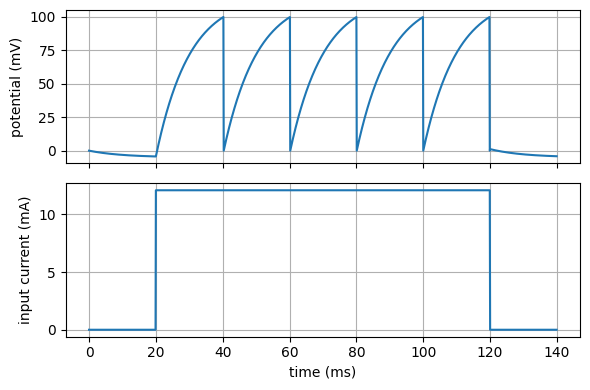

In [18]:
from brian2 import *

start_scope()

# Constants
R = 10 * ohm
C = 1 * mfarad
E_leak = -5 * mV
I_ext = 0 * mA  # Adjusted to alter the period and peak
tau_ref = 0 * ms
v_thr = 100 * mV  # Threshold set to 100 mV
v_rst = 0 * mV  # Reset voltage set to 0 mV
v_initial = 0 * mV

# Differential equation
eqn = '''
dv/dt = -(1/(R*C))*(v-E_leak)+(1/C)*I_ext : volt (unless refractory)
I_ext: amp
'''

# Neuron group
ens = NeuronGroup(1, eqn, threshold='v > v_thr', reset='v = v_rst', refractory=tau_ref, method="exact")
ens.v = v_initial  # Setting initial condition

probe_v = StateMonitor(ens, variables=['v','I_ext'], record=True)
probe_s = SpikeMonitor(ens)

# Simulation
run(20 * ms)
ens.I_ext = 12.085 * mA
run(100 * ms)
ens.I_ext = 0 * mA
run(20 * ms)

# Calculate dv/dt manually
v = probe_v.v[0]
dv_dt = -(1/(R*C))*(v - E_leak) + (1/C)*I_ext

# Plotting membrane potential v and its derivative dv/dt over time
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)  # Create a figure with two subplots

# Plotting membrane potential
axs[0].plot(probe_v.t/ms, v/mV)
axs[0].set_ylabel('potential (mV)')
axs[0].grid(True)
# Plotting dv/dt
axs[1].plot(probe_v.t/ms, probe_v.I_ext[0]/mA)
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('input current (mA)')
axs[1].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


WARNING    'v' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value array([   0.        ,  -49.75083125,  -99.00663347, ...,  -60.1247525 ,
       -109.27733247, -157.9408361 ]) * uvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


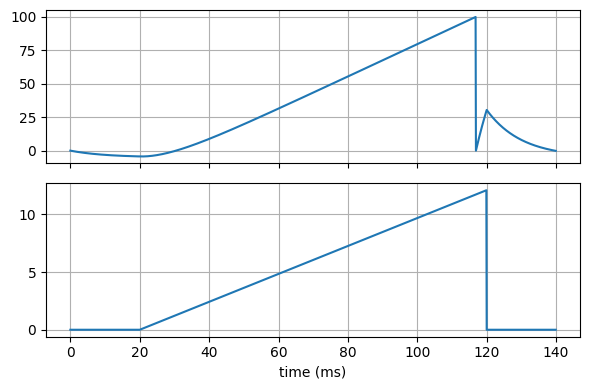

In [17]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

# Constants from the first example
R = 10 * ohm
C = 1 * mfarad
E_leak = -5 * mV
v_thr = 100 * mV  # Threshold set to 100 mV
v_rst = 0 * mV  # Reset voltage set to 0 mV
v_initial = 0 * mV
tau_ref = 0 * ms  # No refractory period

# Time setup for the simulation from the ramp example
pre_duration = 20 * ms  # Duration before the ramp starts
ramp_duration = 100 * ms  # Duration of the ramp
post_duration = 20 * ms  # Duration after the ramp ends
total_duration = pre_duration + ramp_duration + post_duration  # Total simulation duration

# Create a ramp current with zero padding at both ends
current = np.zeros(int(total_duration / defaultclock.dt)) * mA
ramp_start = int(pre_duration / defaultclock.dt)
ramp_end = ramp_start + int(ramp_duration / defaultclock.dt)
current[ramp_start:ramp_end] = np.linspace(0, 12.085, int(ramp_duration / defaultclock.dt)) * mA

# Create TimedArray for the ramp current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Neuron model equations adjusted to include leak and ramp current
eqn = '''
dv/dt = -(v - E_leak) / (R * C) + I_ext(t) / C : volt (unless refractory)
'''

# Setup NeuronGroup
neuron = NeuronGroup(1, eqn, threshold='v > v_thr', reset='v = v_rst', refractory=tau_ref, method="exact")
neuron.v = v_initial  # Setting initial condition

# Monitoring
M = StateMonitor(neuron, 'v', record=True)

# Simulation
run(total_duration)

# Calculate dv/dt manually from the model equation
v = M.v[0]
dv_dt = -(v - E_leak) / (R * C) + I_ext(M.t) / C

# Plotting membrane potential v and its derivative dv/dt over time
fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)  # Create a figure with two subplots

# Plotting membrane potential
axs[0].plot(M.t/ms, v/mV)
axs[0].grid(True)

# Plotting dv/dt
axs[1].plot(M.t/ms, I_ext(M.t)/mA)
axs[1].set_xlabel('time (ms)')
axs[1].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


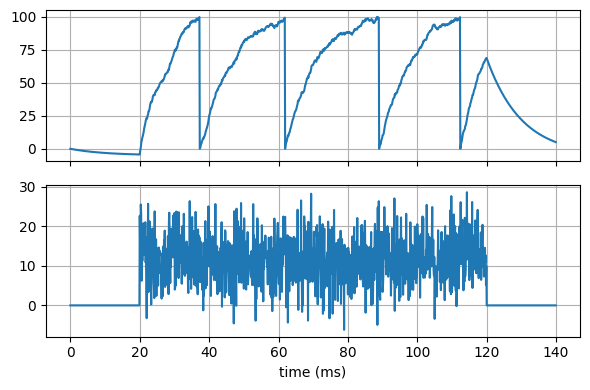

In [16]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

# Constants
R = 10 * ohm
C = 1 * mfarad
E_leak = -5 * mV
tau_ref = 0 * ms
v_thr = 100 * mV
v_rst = 0 * mV
v_initial = 0 * mV

# Time setup for the simulation
pre_duration = 20 * ms
noise_duration = 100 * ms
post_duration = 20 * ms
total_duration = pre_duration + noise_duration + post_duration

# Create a current array with Gaussian noise during the noise period
times = np.arange(0, total_duration / ms, defaultclock.dt / ms) * ms  # Correctly generate time points with units
current = np.zeros(len(times)) * mA
noise_start = int(pre_duration / defaultclock.dt)
noise_end = noise_start + int(noise_duration / defaultclock.dt)

# Gaussian noise parameters
mean_current = 12.085* mA
std_dev = 6 * mA

# Generate Gaussian noise
np.random.seed(0)
gaussian_noise = np.random.normal(mean_current / mA, std_dev / mA, noise_end - noise_start) * mA
current[noise_start:noise_end] = gaussian_noise

# Create TimedArray for the noise current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Neuron model equations
eqn = '''
dv/dt = -(1/(R*C))*(v-E_leak)+(1/C)*I_ext(t) : volt (unless refractory)
'''

# Neuron group
neuron = NeuronGroup(1, eqn, threshold='v > v_thr', reset='v = v_rst', refractory=tau_ref, method="exact")
neuron.v = v_initial

# Monitoring
probe_v = StateMonitor(neuron, 'v', record=True)

# Simulation
run(total_duration)

# Plotting membrane potential and input current over time
fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# Plotting membrane potential
axs[0].plot(probe_v.t/ms, probe_v.v[0]/mV)
axs[0].grid(True)

# Plotting input current
axs[1].plot(times/ms, I_ext(times)/mA)
axs[1].set_xlabel('time (ms)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Exponential Integrate and Fire Model

WARNING    'v' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value array([ 0.        , -0.04975083, -0.09900663, ..., -4.14196007,
       -4.15049771, -4.1589504 ]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


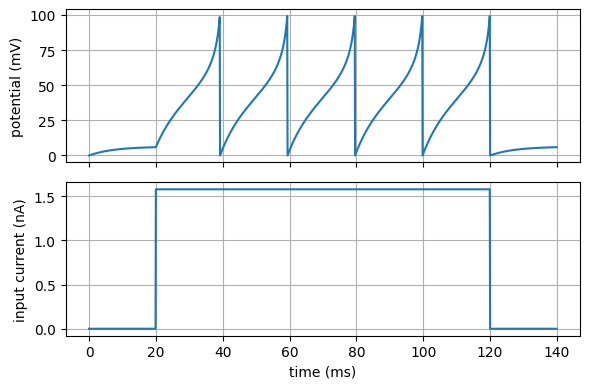

In [19]:
from brian2 import *

start_scope()

# Constants
C = 281*pF
gL = 50*nS
EL = 0*mV
V_T = 40.6*mV
Delta_T = 25*mV
I_ext = 0 *pA

# Differential equation
eqn = '''
dv/dt = (gL*(EL - v) + gL*Delta_T*exp((v - V_T)/Delta_T) + I_ext)/C : volt
I_ext : amp
'''

# Neuron group
eif = NeuronGroup(1, eqn, threshold='v > 100*mV', reset='v = EL', method='exponential_euler')
eif.v = EL  # initial voltage

# Monitoring voltage
probe_eif = StateMonitor(eif, variables=['v','I_ext'], record=True)

# Simulation
run(20*ms)
eif.I_ext = 1580*pA
run(100*ms)
eif.I_ext = 0*pA
run(20*ms)


# Calculating dv/dt manually
v = probe_eif.v[0]
dv_dt = (gL * (EL - v) + gL * Delta_T * exp((v - V_T) / Delta_T) + I_ext) / C

# Plotting membrane potential v and its derivative dv/dt over time
fig, axs = plt.subplots(2, 1, figsize=(6, 4))  # Creating a figure with two subplots



# Plotting membrane potential
axs[0].plot(probe_eif.t/ms, v/mV)
axs[0].set_ylabel('potential (mV)')
axs[0].grid(True)
axs[0].set_xticklabels([])

# Plotting dv/dt
axs[1].plot(probe_eif.t/ms, probe_eif.I_ext[0]/nA)
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('input current (nA)')
axs[1].grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


WARNING    'v' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value array([0.        , 0.08690632, 0.17258257, ..., 5.90321653, 5.90915879,
       5.91502242]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


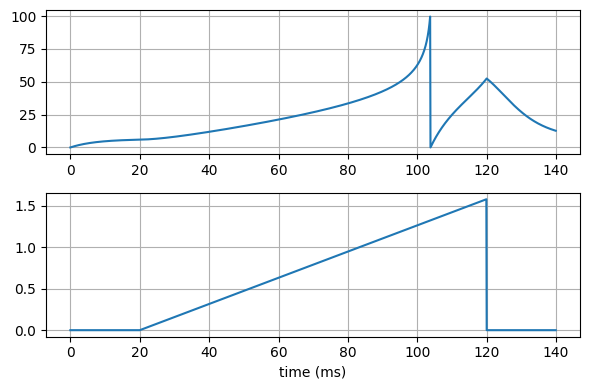

In [20]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

# Start Brian environment
start_scope()

# Constants for EIF model
C = 281*pF
gL = 50*nS
EL = 0*mV
V_T = 40.6*mV
Delta_T = 25*mV

# Simulation setup for ramp input
pre_duration = 20 * ms  # Duration before the ramp starts
ramp_duration = 100 * ms  # Duration of the ramp
post_duration = 20 * ms  # Duration after the ramp ends
total_duration = pre_duration + ramp_duration + post_duration  # Total simulation duration

# Create a ramp current with zero padding at both ends
current = np.zeros(int(total_duration / defaultclock.dt)) * pA
ramp_start = int(pre_duration / defaultclock.dt)
ramp_end = ramp_start + int(ramp_duration / defaultclock.dt)
current[ramp_start:ramp_end] = np.linspace(0, 1580, int(ramp_duration / defaultclock.dt)) * pA  # Ramp up to 1580 pA

# Create TimedArray for the ramp current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Differential equation for the EIF model with dynamic input
eqn = '''
dv/dt = (gL*(EL - v) + gL*Delta_T*exp((v - V_T)/Delta_T) + I_ext(t))/C : volt
'''

# Neuron group setup
eif = NeuronGroup(1, eqn, threshold='v > 100*mV', reset='v = EL', method='exponential_euler')
eif.v = EL  # initial voltage

# Monitoring voltage and input current
probe_eif = StateMonitor(eif, variables=['v'], record=True)

# Run the simulation
run(total_duration)

# Plotting membrane potential and input current
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

# Plotting membrane potential
axs[0].plot(probe_eif.t/ms, probe_eif.v[0]/mV)
axs[0].grid(True)

# Plotting input current
axs[1].plot(probe_eif.t/ms, I_ext(probe_eif.t)/nA)
axs[1].set_xlabel('time (ms)')
axs[1].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


WARNING    'v' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value array([0.        , 0.08690632, 0.17258257, ..., 5.90321653, 5.90915879,
       5.91502242]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


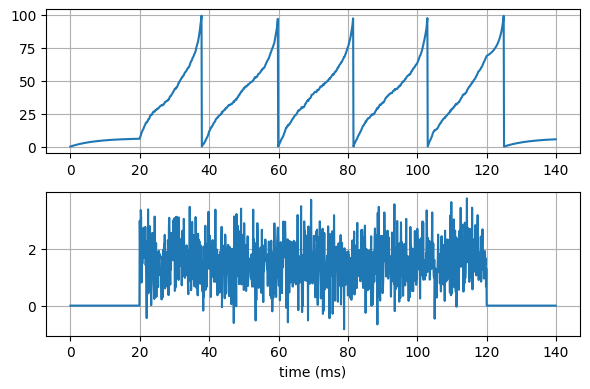

In [21]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

# Initialize Brian2 environment
start_scope()

# Constants for EIF model
C = 281 * pF
gL = 50 * nS
EL = 0 * mV
V_T = 40.6 * mV
Delta_T = 25 * mV

# Setup for Gaussian noise input
pre_duration = 20 * ms  # No input
noise_duration = 100 * ms  # Gaussian noise active
post_duration = 20 * ms  # No input
total_duration = pre_duration + noise_duration + post_duration

# Gaussian noise parameters
mean_current = 1580 * pA  # Mean of the Gaussian noise
std_dev = (1580/2) * pA  # Standard deviation

# Generate Gaussian noise
np.random.seed(0)  # Seed for reproducibility
noise_values = np.random.normal(mean_current / pA, std_dev / pA, int(noise_duration / defaultclock.dt)) * pA
current = np.zeros(int(total_duration / defaultclock.dt)) * pA
current[int(pre_duration / defaultclock.dt):int(pre_duration / defaultclock.dt) + len(noise_values)] = noise_values

# Create TimedArray for the noise current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Differential equation with Gaussian noise input
eqn = '''
dv/dt = (gL*(EL - v) + gL*Delta_T*exp((v - V_T)/Delta_T) + I_ext(t))/C : volt
'''

# Neuron group setup
eif = NeuronGroup(1, eqn, threshold='v > 100*mV', reset='v = EL', method='exponential_euler')
eif.v = EL

# Monitoring voltage and current
probe_eif = StateMonitor(eif, variables=['v'], record=True)

# Run the simulation
run(total_duration)

# Plotting membrane potential and input current
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

# Plotting membrane potential
axs[0].plot(probe_eif.t/ms, probe_eif.v[0]/mV)
axs[0].grid(True)

# Plotting input current
axs[1].plot(probe_eif.t/ms, I_ext(probe_eif.t)/nA)
axs[1].set_xlabel('time (ms)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Quadratic Integrate and Fire Model

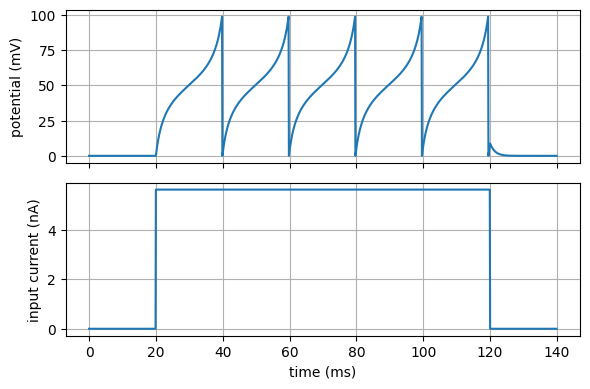

In [22]:
from brian2 import *

start_scope()

# Parameters
C = 281*pF
a = 2*nS/mV
EL = 0*mV
VT = 100*mV

# Model equations
eqs = '''
dv/dt = (a*(v-EL)*(v-VT) + I)/C : volt
I : amp
'''

# Neuron group
qif = NeuronGroup(1, eqs, threshold='v > VT', reset='v = EL', method='euler')
qif.v = 0 * mV  # initial voltage
qif.I = 0*pA

# Monitoring voltage only
probe_qif = StateMonitor(qif, variables=['v','I'], record=True)

# Simulation
run(20*ms)
qif.I = 5610 * pA
run(100 * ms)
qif.I = 0* pA
run(20*ms)

# Calculating dv/dt manually
dv_dt = (a * (probe_qif.v[0] - EL) * (probe_qif.v[0] - VT) + qif.I) / C

# Plotting membrane potential v and its derivative dv/dt over time
fig, axs = plt.subplots(2, 1, figsize=(6, 4))  # Creating a figure with two subplots

# Plotting membrane potential
axs[0].plot(probe_qif.t/ms, probe_qif.v[0]/mV)
axs[0].set_ylabel('potential (mV)')
axs[0].grid(True)
axs[0].set_xticklabels([])

# Plotting dv/dt
axs[1].plot(probe_qif.t/ms, probe_qif.I[0]/nA)
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('input current (nA)')
axs[1].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


WARNING    'v' is an internal variable of group 'neurongroup_4', but also exists in the run namespace with the value array([0.        , 0.08690632, 0.17258257, ..., 5.90321653, 5.90915879,
       5.91502242]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


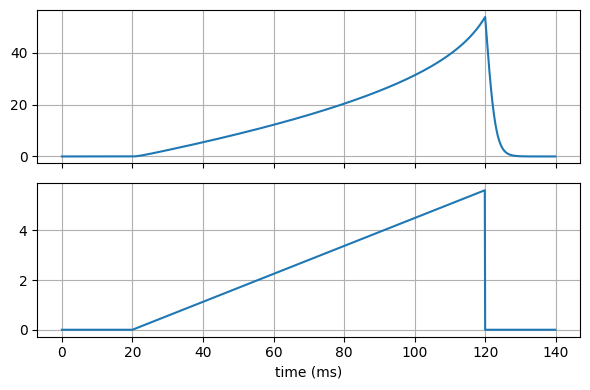

In [23]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

# Parameters
C = 281*pF
a = 2*nS/mV
EL = 0*mV
VT = 100*mV

# Time setup for the simulation
pre_duration = 20 * ms  # Duration before the ramp starts
ramp_duration = 100 * ms  # Duration of the ramp
post_duration = 20 * ms  # Duration after the ramp ends
total_duration = pre_duration + ramp_duration + post_duration  # Total simulation duration

# Create a ramp current with zero padding at both ends
current = np.zeros(int(total_duration / defaultclock.dt)) * pA
ramp_start = int(pre_duration / defaultclock.dt)
ramp_end = ramp_start + int(ramp_duration / defaultclock.dt)
current[ramp_start:ramp_end] = np.linspace(0, 5610, int(ramp_duration / defaultclock.dt)) * pA  # Linear ramp to 5610 pA

# Create TimedArray for the ramp current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Model equations
eqs = '''
dv/dt = (a*(v-EL)*(v-VT) + I)/C : volt
I = I_ext(t) : amp
'''

# Neuron group
qif = NeuronGroup(1, eqs, threshold='v > VT', reset='v = EL', method='euler')
qif.v = 0 * mV  # initial voltage

# Monitoring voltage and current
probe_qif = StateMonitor(qif, variables=['v', 'I'], record=True)

# Simulation
run(total_duration)

# Plotting membrane potential v and input current over time
fig, axs = plt.subplots(2, 1, figsize=(6, 4))  # Creating a figure with two subplots

# Plotting membrane potential
axs[0].plot(probe_qif.t/ms, probe_qif.v[0]/mV)

axs[0].grid(True)
axs[0].set_xticklabels([])  # Hide x-axis labels on the first plot

# Plotting input current
axs[1].plot(probe_qif.t/ms, probe_qif.I[0]/nA)
axs[1].set_xlabel('time (ms)')

axs[1].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


WARNING    't' is an internal variable of group 'neurongroup_4', but also exists in the run namespace with the value 97.2 * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


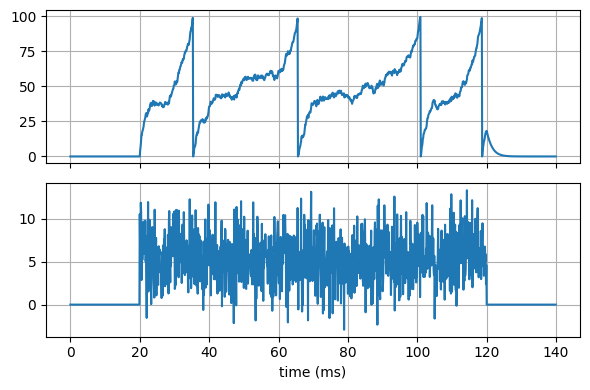

In [31]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

# Initialize Brian2 environment
start_scope()

# Parameters
C = 281*pF
a = 2*nS/mV
EL = 0*mV
VT = 100*mV

# Setup for Gaussian noise input
pre_duration = 20 * ms  # No input
noise_duration = 100 * ms  # Gaussian noise active
post_duration = 20 * ms  # No input
total_duration = pre_duration + noise_duration + post_duration

# Gaussian noise parameters
mean_current = 5610 * pA  # Mean of the Gaussian noise
std_dev = (5610/2) * pA  # Standard deviation

# Generate Gaussian noise
np.random.seed(0)  # Seed for reproducibility
noise_values = np.random.normal(mean_current / pA, std_dev / pA, int(noise_duration / defaultclock.dt)) * pA
current = np.zeros(int(total_duration / defaultclock.dt)) * pA
current[int(pre_duration / defaultclock.dt):int(pre_duration / defaultclock.dt) + len(noise_values)] = noise_values

# Create TimedArray for the noise current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Model equations
eqs = '''
dv/dt = (a*(v-EL)*(v-VT) + I)/C : volt
I = I_ext(t) : amp
'''

# Neuron group
qif = NeuronGroup(1, eqs, threshold='v > VT', reset='v = EL', method='euler')
qif.v = 0 * mV  # initial voltage

# Monitoring voltage and current
probe_qif = StateMonitor(qif, variables=['v', 'I'], record=True)

# Simulation
run(total_duration)

# Plotting membrane potential v and input current over time
fig, axs = plt.subplots(2, 1, figsize=(6, 4))  # Creating a figure with two subplots

# Plotting membrane potential
axs[0].plot(probe_qif.t/ms, probe_qif.v[0]/mV)

axs[0].grid(True)
axs[0].set_xticklabels([])  # Hide x-axis labels on the first plot

# Plotting input current
axs[1].plot(probe_qif.t/ms, probe_qif.I[0]/nA)
axs[1].set_xlabel('time (ms)')

axs[1].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Izhikevich Model

WARNING    'I' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 0. * amp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


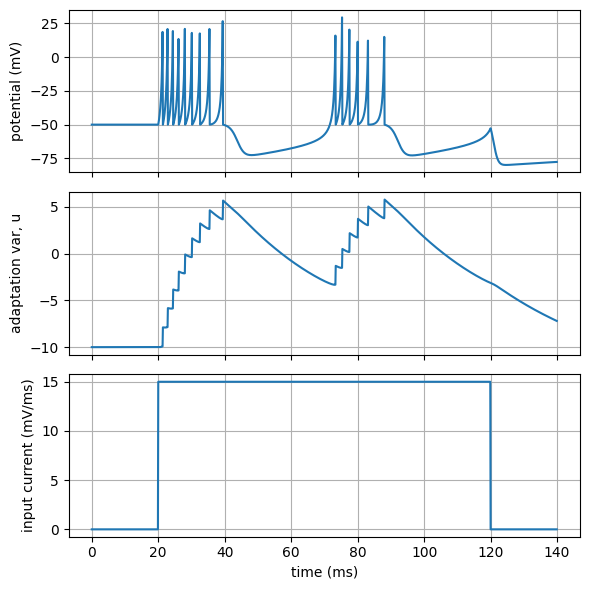

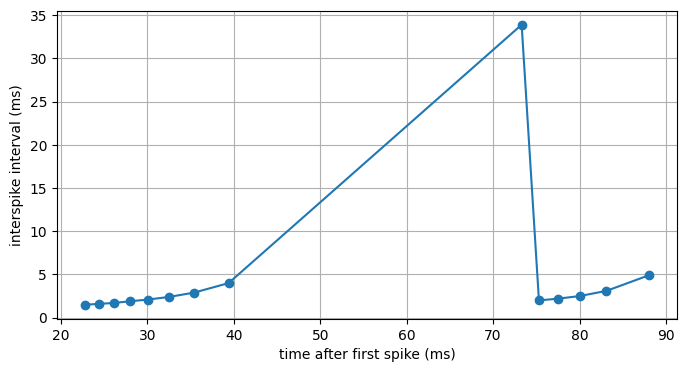

In [32]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

start_scope()

# Parameters
number = 1  # Number of neurons
a = 0.02/ms
b = 0.2/ms
c = -50 * mV
d = 2 * mV/ms  # Ensure this is positive as it's an increase on reset
max_I = 15 * mV/ms  # Max input current

# Neuronal equations of the Izhikevich-neuron
eqs = '''
dv/dt = 0.04/ms/mV * v**2 + 5/ms * v + 140*mV/ms - u + I : volt
du/dt = a * (b * v - u) : volt/second
I : volt/second
'''

# Reset condition, ensure 'd' is used correctly
reset = '''
v = c
u += d
'''

# Set up neuron population
G = NeuronGroup(number, eqs, threshold='v >= 30*mV', reset=reset, method='euler')
G.v = c
G.u = b * c
G.I = 0*mV/ms  # Initially no input current

# Monitoring variables
M = StateMonitor(G, ['v', 'u', 'I'], record=True)
spikes = SpikeMonitor(G)

# Simulation schedule
run(20*ms)  # No input current phase
G.I = max_I  # Apply maximum input current
run(100*ms)  # Run with input current
G.I = 0*mV/ms  # Turn off input current
run(20*ms)  # Final no input current phase

# Plotting setup for membrane potential, adaptation variable, and input current
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

# Membrane potential plot
axs[0].plot(M.t/ms, M.v[0]/mV)
axs[0].set_ylabel('potential (mV)')
axs[0].grid(True)
axs[0].set_xticklabels([])

# Membrane potential plot
axs[1].plot(M.t/ms, M.u[0])
axs[1].set_ylabel('adaptation var, u')
axs[1].grid(True)
axs[1].set_xticklabels([])

# Input current plot
axs[2].plot(M.t/ms, M.I[0]/(mV/ms))
axs[2].set_xlabel('time (ms)')
axs[2].set_ylabel('input current (mV/ms)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Separate plot for ISI
if len(spikes.t) > 1:
    isis = np.diff(spikes.t/ms)
    plt.figure(figsize=(8, 4))
    plt.plot(spikes.t[1:]/ms, isis, 'o-')
    plt.xlabel('time after first spike (ms)')
    plt.ylabel('interspike interval (ms)')
    plt.grid(True)
    plt.show()
else:
    plt.figure(figsize=(8, 4))
    plt.text(0.5, 0.5, 'No spikes', horizontalalignment='center', verticalalignment='center')
    plt.xlabel('Time (ms)')
    plt.ylabel('ISI (ms)')
    plt.grid(True)
    plt.show()



WARNING    'v' is an internal variable of group 'neurongroup_5', but also exists in the run namespace with the value array([0.        , 0.08690632, 0.17258257, ..., 5.90321653, 5.90915879,
       5.91502242]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


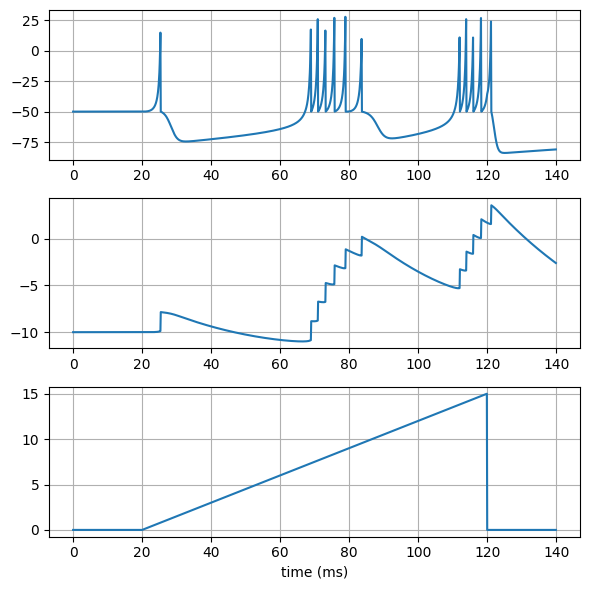

In [25]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

# Constants for Izhikevich neuron
number = 1  # Number of neurons
a = 0.02/ms
b = 0.2/ms
c = -50 * mV
d = 2 * mV/ms  # Ensure this is positive as it's an increase on reset
max_I = 15 * mV/ms  # Max input current for ramp

# Time setup for the simulation with ramp input
pre_duration = 20 * ms  # Duration before the ramp starts
ramp_duration = 100 * ms  # Duration of the ramp
post_duration = 20 * ms  # Duration after the ramp ends
total_duration = pre_duration + ramp_duration + post_duration  # Total simulation duration

# Create a ramp current with zero padding at both ends
current = np.zeros(int(total_duration / defaultclock.dt)) * mV/ms
ramp_start = int(pre_duration / defaultclock.dt)
ramp_end = ramp_start + int(ramp_duration / defaultclock.dt)
current[ramp_start:ramp_end] = np.linspace(0, max_I / (mV/ms), int(ramp_duration / defaultclock.dt)) * mV/ms

# Create TimedArray for the ramp current
I = TimedArray(current, dt=defaultclock.dt)

# Neuronal equations of the Izhikevich-neuron with dynamic current input
eqs = '''
dv/dt = 0.04/ms/mV * v**2 + 5/ms * v + 140*mV/ms - u + I(t) : volt
du/dt = a * (b * v - u) : volt/second
'''

# Set up neuron population with adjusted equations
G = NeuronGroup(number, eqs, threshold='v >= 30*mV', reset=reset, method='euler')
G.v = c
G.u = b * c

# Monitoring variables
M = StateMonitor(G, ['v', 'u'], record=True)

# Simulation
run(total_duration)

# Plotting setup
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

# Membrane potential plot
axs[0].plot(M.t/ms, M.v[0]/mV)
axs[0].grid(True)

# Recovery variable plot
axs[1].plot(M.t/ms, M.u[0]/(mV/ms))
axs[1].grid(True)

# Input current plot
axs[2].plot(M.t/ms, I(M.t)/(mV/ms))
axs[2].set_xlabel('time (ms)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


WARNING    'v' is an internal variable of group 'neurongroup_6', but also exists in the run namespace with the value array([0.        , 0.08690632, 0.17258257, ..., 5.90321653, 5.90915879,
       5.91502242]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


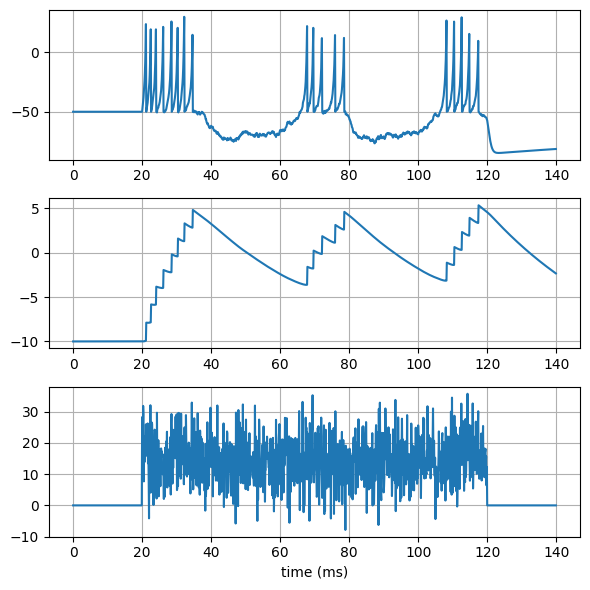

In [26]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

# Parameters for the Izhikevich model
number = 1  # Number of neurons
a = 0.02/ms
b = 0.2/ms
c = -50 * mV
d = 2 * mV/ms  # Ensure this is positive as it's an increase on reset

# Time setup for the simulation with Gaussian input
pre_duration = 20 * ms  # Duration before the noise starts
noise_duration = 100 * ms  # Duration of the noise
post_duration = 20 * ms  # Duration after the noise ends
total_duration = pre_duration + noise_duration + post_duration

# Create a current array with Gaussian noise during the noise period
current = np.zeros(int(total_duration / defaultclock.dt)) * mV/ms
noise_start = int(pre_duration / defaultclock.dt)
noise_end = noise_start + int(noise_duration / defaultclock.dt)

# Gaussian noise parameters
mean_current = 15 * mV/ms  # Mean current
std_dev =7.5 * mV/ms  # 50% of the mean current as the standard deviation

# Generate Gaussian noise
np.random.seed(0)  # Seed for reproducibility
gaussian_noise = np.random.normal(mean_current, std_dev, noise_end - noise_start) * mV/ms
current[noise_start:noise_end] = gaussian_noise

# Create TimedArray for the Gaussian noise current
I = TimedArray(current, dt=defaultclock.dt)

# Neuronal equations of the Izhikevich-neuron with dynamic current input
eqs = '''
dv/dt = 0.04/ms/mV * v**2 + 5/ms * v + 140*mV/ms - u + I(t) : volt
du/dt = a * (b * v - u) : volt/second
'''

# Reset condition, ensure 'd' is used correctly
reset = '''
v = c
u += d
'''

# Set up neuron population
G = NeuronGroup(number, eqs, threshold='v >= 30*mV', reset=reset, method='euler')
G.v = c
G.u = b * c

# Monitoring variables
M = StateMonitor(G, ['v', 'u'], record=True)

# Simulation
run(total_duration)

# Plotting setup
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

# Membrane potential plot
axs[0].plot(M.t/ms, M.v[0]/mV)
axs[0].grid(True)

# Recovery variable plot
axs[1].plot(M.t/ms, M.u[0])
axs[1].grid(True)

# Input current plot
axs[2].plot(M.t/ms, I(M.t)/(mV/ms))
axs[2].set_xlabel('time (ms)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


Adaptive Exponential Integrate and Fire Model

WARNING    'vm' is an internal variable of group 'neurongroup_5', but also exists in the run namespace with the value array([ 0.        ,  0.0876818 ,  0.17411149, ..., -1.33052   ,
       -1.32784406, -1.32513319]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'w' is an internal variable of group 'neurongroup_5', but also exists in the run namespace with the value array([0.00000000e+00, 0.00000000e+00, 2.43560554e-04, ...,
       2.92622424e+02, 2.92415518e+02, 2.92208763e+02]) * pamp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


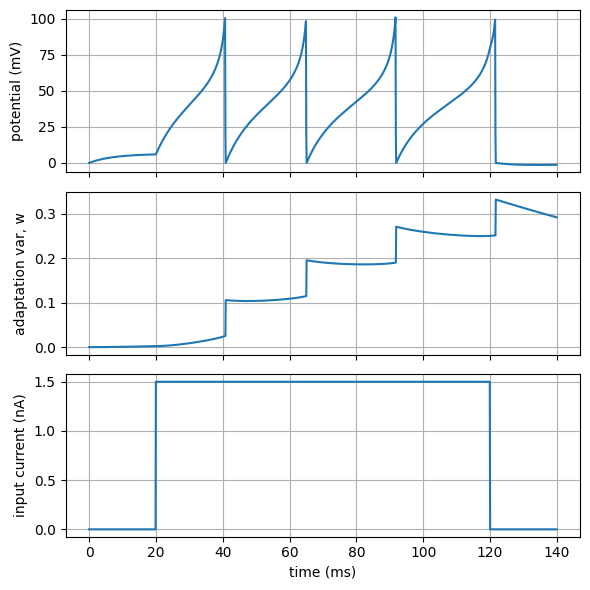

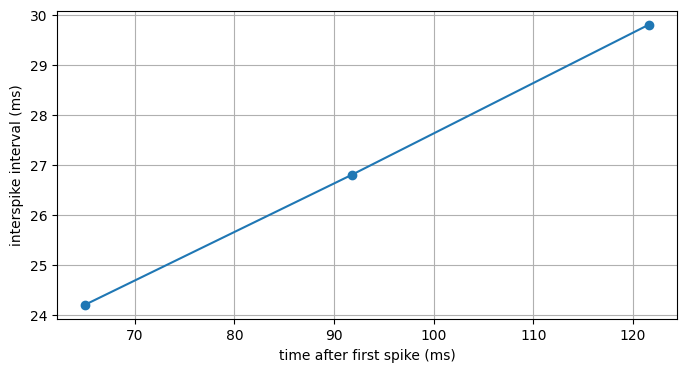

In [33]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

start_scope()

# Parameters
C = 281*pF
gL = 50*nS
EL = 0*mV
VT = 40.6*mV
DeltaT = 25*mV
Vcut = 105*mV
I = 0*pA  # Initial input current

# Electrophysiological behavior parameters
tauw, a, b, Vr = 144*ms, 4*nS, 0.0805*nA, 0*mV  # Regular spiking

# Neuron model equations
eqs = """
dvm/dt = (gL*(EL - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + I - w)/C : volt
dw/dt = (a*(vm - EL) - w)/tauw : amp
I : amp
"""

# Neuron setup
neuron = NeuronGroup(1, model=eqs, threshold='vm>Vcut', reset="vm=Vr; w+=b", method='euler')
neuron.vm = EL  # Initial membrane potential
neuron.w = 0*pA  # Initial adaptation variable
neuron.I = 0*pA  # Set initial input current

# Monitoring variables
trace = StateMonitor(neuron, ['vm', 'w', 'I'], record=True)
spikes = SpikeMonitor(neuron)

# Run simulation with varying input current
run(20 * ms)  # initial phase with I=0*pA
neuron.I = 1.5*nA  # change current
run(100 * ms)  # run with the non-zero current
neuron.I = 0*pA  # set current back to zero
run(20 * ms)  # final phase

# Calculate dv/dt manually from the model equation
vm = trace.vm[0]
w = trace.w[0]
dv_dt = (gL*(EL - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + trace.I[0] - w) / C

# Adjust spikes in the vm_plot
vm_plot = np.array(vm)
for t in spikes.t:
    i = int(t / defaultclock.dt)
    vm_plot[i] = 20*mV  # Set spikes to a visible peak

# Plotting membrane potential, dv/dt, and input current
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

# Plot membrane potential
axs[0].plot(trace.t/ms, vm_plot/mV)
axs[0].set_ylabel('potential (mV)')
axs[0].grid(True)
axs[0].set_xticklabels([])

# Plot derivative of membrane potential
axs[1].plot(trace.t/ms, w/nA)
axs[1].set_ylabel('adaptation var, w')
axs[1].grid(True)
axs[1].set_xticklabels([])

# Plot input current over time
axs[2].plot(trace.t/ms, trace.I[0]/nA)
axs[2].set_xlabel('time (ms)')
axs[2].set_ylabel('input current (nA)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Plotting the ISI plot in a separate figure
if len(spikes.t) > 1:
    isis = np.diff(spikes.t/ms)
    plt.figure(figsize=(8, 4))
    plt.plot(spikes.t[1:]/ms, isis, 'o-')
    plt.xlabel('time after first spike (ms)')
    plt.ylabel('interspike interval (ms)')
    plt.grid(True)
    plt.show()
else:
    plt.figure(figsize=(6, 4))
    plt.text(0.5, 0.5, 'No spikes', horizontalalignment='center', verticalalignment='center')
    plt.title('Interspike Interval (ISI)')
    plt.xlabel('Time (ms)')
    plt.ylabel('ISI (ms)')
    plt.grid(True)
    plt.show()


WARNING    't' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 121.6 * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'vm' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value array([ 0.        ,  0.0876818 ,  0.17411149, ..., -1.33052   ,
       -1.32784406, -1.32513319]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'w' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value array([0.00000000e+00, 0.00000000e+00, 2.43560554e-04, ...,
       2.92622424e+02, 2.92415518e+02, 2.92208763e+02]) * pamp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


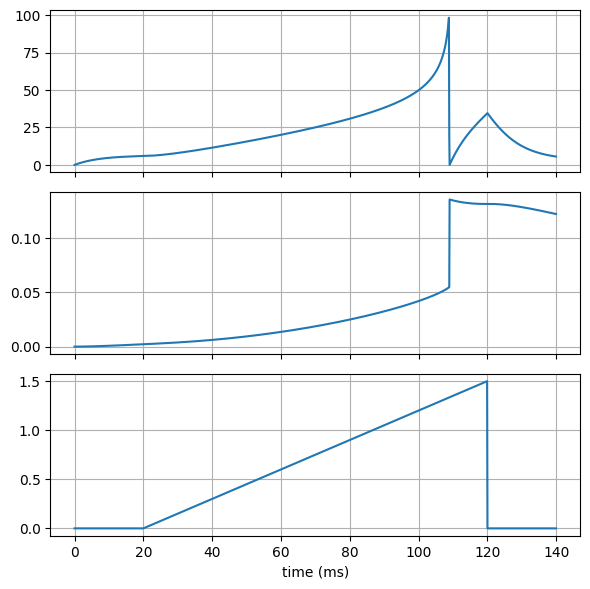

In [28]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

# Parameters for the Izhikevich neuron model
C = 281*pF
gL = 50*nS
EL = 0*mV
VT = 40.6*mV
DeltaT = 25*mV
Vcut = 105*mV

# Adaptation and spike timing parameters
tauw, a, b, Vr = 144*ms, 4*nS, 0.0805*nA, 0*mV  # Regular spiking

# Time setup for the ramp input simulation
pre_duration = 20 * ms  # No input current
ramp_duration = 100 * ms  # Duration of ramp input
post_duration = 20 * ms  # No input current after the ramp
total_duration = pre_duration + ramp_duration + post_duration

# Create a ramp current with zero padding at both ends
current = np.zeros(int(total_duration / defaultclock.dt)) * nA
ramp_start = int(pre_duration / defaultclock.dt)
ramp_end = ramp_start + int(ramp_duration / defaultclock.dt)
current[ramp_start:ramp_end] = np.linspace(0, 1.5*nA, int(ramp_duration / defaultclock.dt))  # Linear increase to 1.5 nA

# Create TimedArray for the ramp current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Neuron model equations with dynamic input current
eqs = """
dvm/dt = (gL*(EL - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + I - w)/C : volt
dw/dt = (a*(vm - EL) - w)/tauw : amp
I = I_ext(t) : amp
"""

# Neuron setup
neuron = NeuronGroup(1, model=eqs, threshold='vm>Vcut', reset="vm=Vr; w+=b", method='euler')
neuron.vm = EL  # Initial membrane potential
neuron.w = 0*pA  # Initial adaptation variable

# Monitoring variables
trace = StateMonitor(neuron, ['vm', 'w', 'I'], record=True)
spikes = SpikeMonitor(neuron)

# Run the simulation
run(total_duration)

# Adjust spikes in the vm_plot
vm_plot = np.array(trace.vm[0])
for t in spikes.t:
    i = int(t / defaultclock.dt)
    vm_plot[i] = 20*mV  # Set spikes to a visible peak

# Plotting membrane potential, w, and input current
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)

# Plot membrane potential
axs[0].plot(trace.t/ms, vm_plot/mV)
axs[0].grid(True)

# Plot adaptation term, w
axs[1].plot(trace.t/ms, trace.w[0]/nA)
axs[1].grid(True)

# Plot input current over time
axs[2].plot(trace.t/ms, trace.I[0]/nA)
axs[2].set_xlabel('time (ms)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


WARNING    't' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value 108.9 * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'vm' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value array([ 0.        ,  0.0876818 ,  0.17411149, ..., -1.33052   ,
       -1.32784406, -1.32513319]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'w' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value array([0.00000000e+00, 0.00000000e+00, 2.43560554e-04, ...,
       2.92622424e+02, 2.92415518e+02, 2.92208763e+02]) * pamp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


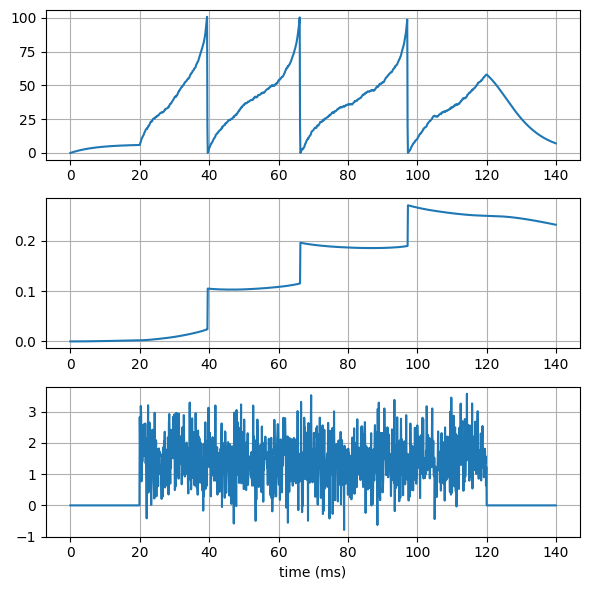

In [29]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

# Izhikevich neuron parameters
C = 281 * pF
gL = 50 * nS
EL = 0 * mV
VT = 40.6 * mV
DeltaT = 25 * mV
Vcut = 105 * mV

# Adaptation parameters
tauw, a, b, Vr = 144 * ms, 4 * nS, 0.0805 * nA, 0 * mV  # Regular spiking

# Time setup for the simulation with Gaussian input
pre_duration = 20 * ms  # Duration before the noise starts
noise_duration = 100 * ms  # Duration of the noise
post_duration = 20 * ms  # Duration after the noise ends
total_duration = pre_duration + noise_duration + post_duration

# Create a Gaussian noise current array
current = np.zeros(int(total_duration / defaultclock.dt)) * nA
noise_start = int(pre_duration / defaultclock.dt)
noise_end = noise_start + int(noise_duration / defaultclock.dt)

# Gaussian noise parameters
mean_current = 1.5  # Mean current
std_dev = 0.75   # Standard deviation (50% of the mean)

# Generate Gaussian noise
np.random.seed(0)  # Seed for reproducibility
gaussian_noise = np.random.normal(mean_current, std_dev, noise_end - noise_start)
current[noise_start:noise_end] = gaussian_noise * nA

# Create TimedArray for the noise current
I_ext = TimedArray(current, dt=defaultclock.dt)

# Neuron model equations incorporating the Gaussian input
eqs = """
dvm/dt = (gL*(EL - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + I - w)/C : volt
dw/dt = (a*(vm - EL) - w)/tauw : amp
I = I_ext(t) : amp
"""

# Neuron setup
neuron = NeuronGroup(1, model=eqs, threshold='vm>Vcut', reset="vm=Vr; w+=b", method='euler')
neuron.vm = EL  # Initial membrane potential
neuron.w = 0 * pA  # Initial adaptation variable

# Monitoring variables
trace = StateMonitor(neuron, ['vm', 'w', 'I'], record=True)
spikes = SpikeMonitor(neuron)

# Run the simulation
run(total_duration)

# Adjust spikes in the vm_plot for visibility
vm_plot = np.array(trace.vm[0])
for t in spikes.t:
    i = int(t / defaultclock.dt)
    vm_plot[i] = 20 * mV  # Set spikes to a visible peak

# Plotting setup
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

# Plot membrane potential
axs[0].plot(trace.t/ms, vm_plot/mV)
axs[0].grid(True)

# Plot adaptation variable w
axs[1].plot(trace.t/ms, trace.w[0]/nA)
axs[1].grid(True)

# Plot input current over time
axs[2].plot(trace.t/ms, trace.I[0]/nA)
axs[2].set_xlabel('time (ms)')
axs[2].grid(True)

plt.tight_layout()
plt.show()
